### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method

In [2]:
# code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [5]:
df_new = df.dropna(subset = ['age'])
df_new.head()
df_new['age'].isnull().sum()

np.int64(0)

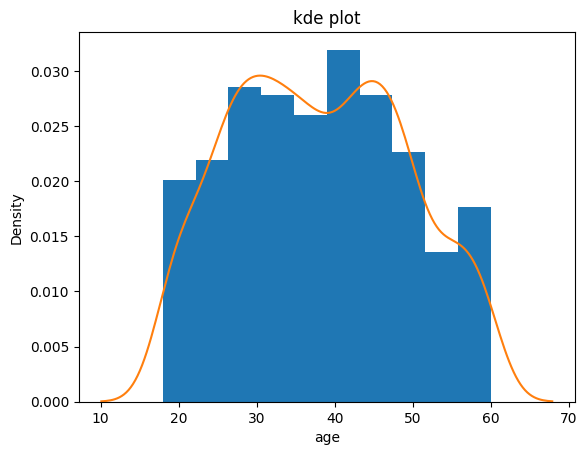

In [6]:
plt.hist(df['age'], density=True)
fig = sns.kdeplot(data = df_new['age'])
plt.title("kde plot")
plt.show()

### Q-2: What is the probability of a patient having a BMI greater than 30?

In [7]:
bmi_more_than_30 = df[df['bmi']>30]
prob = len(bmi_more_than_30)/df.shape[0]
prob

0.5216417910447761

### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

<Axes: xlabel='claim', ylabel='Count'>

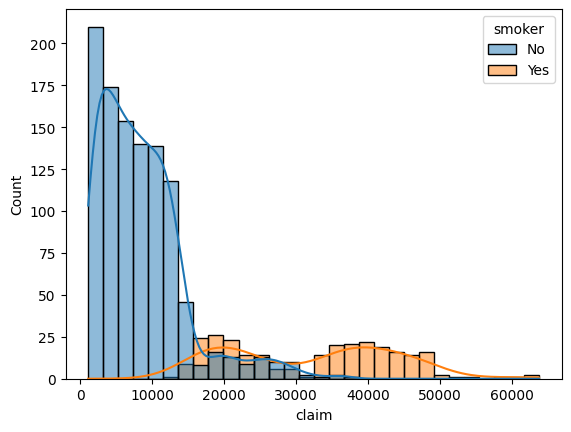

In [8]:
# code here
sns.histplot(df, x='claim', kde = True, hue='smoker')

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

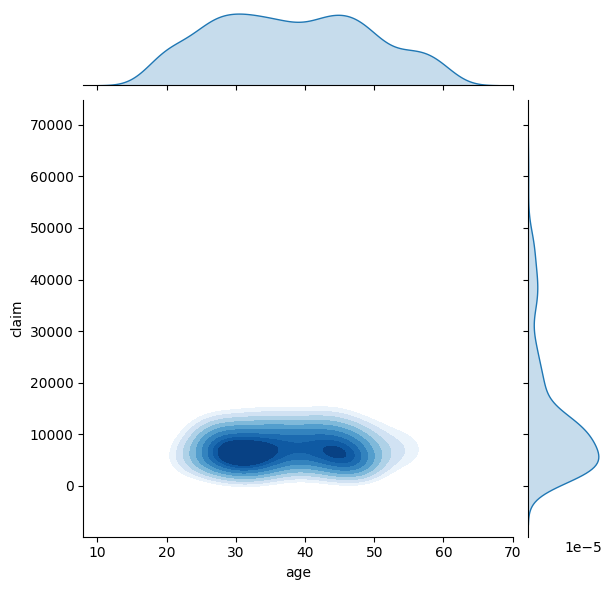

In [12]:
sns.jointplot(
    data=df,
    x="age",
    y="claim",
    kind="kde",            # or 'scatter', 'reg', etc.
    fill=True,             # for kde/hist: fills contours or bars
    cmap="Blues",          # color map
    thresh=0.5,            # threshold for KDE contours
      # customize marginal histograms
)

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

<Axes: xlabel='claim', ylabel='Density'>

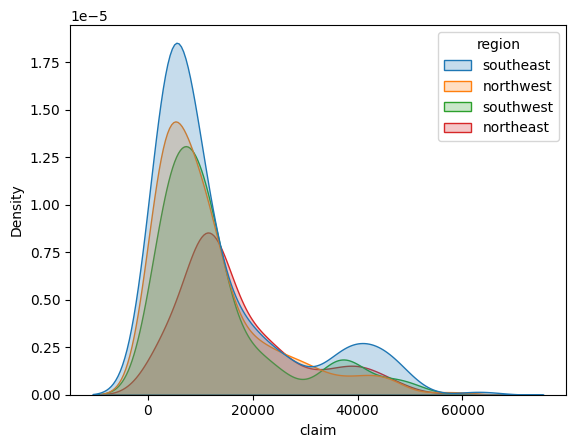

In [ ]:
# code here
sns.kdeplot(df , x='claim', hue='region', fill=True)

### Q6: Plot PDF and CDF of claim in insurance data

Text(0.5, 1.0, 'CDF')

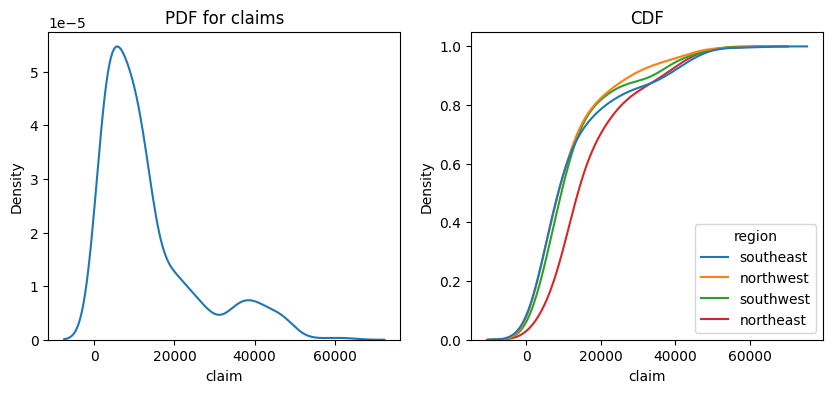

In [29]:
# code here
claim_data = df['claim']
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.kdeplot(data = claim_data)
plt.title('PDF for claims')

plt.subplot(1,2,2)
sns.kdeplot(data=df, x="claim", hue="region", cumulative=True, common_norm=False)
plt.title("CDF")


### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

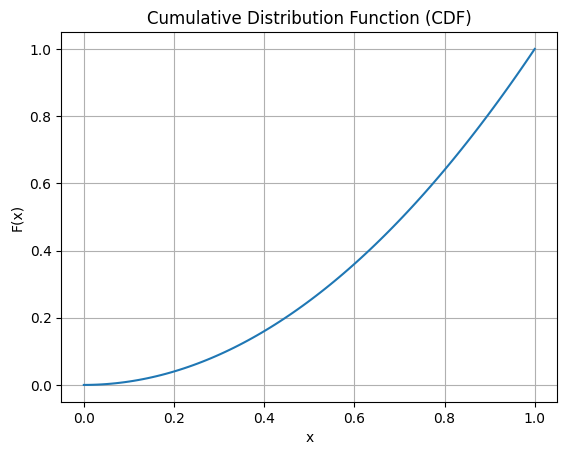

Probability that X is greater than 0.5: 0.75


In [39]:
def pdf(x):
    if 0 <= x <= 1:
        return 2 * x
    else:
        return 0
def cdf(x):
    if x < 0:
        return 0
    elif 0 <= x <= 1:
        return x ** 2
    else:
        return 1

x = np.linspace(0, 1, 100)
y_cdf = np.array([cdf(xi) for xi in x])
plt.plot(x, y_cdf)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)
plt.show()

prob = 1-cdf(0.5)
print("Probability that X is greater than 0.5:", prob)


### Q-8: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

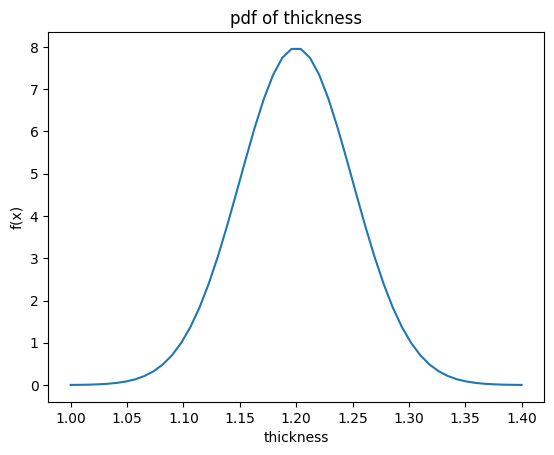

In [14]:
# answer here
mean = 1.2
std = 0.05

def pdf(x, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))
x = np.linspace(1.0,1.4,50)
pdf1 = pdf(x, mean, std)

plt.plot(x,pdf1)
plt.xlabel("thickness")
plt.ylabel("f(x)")
plt.title("pdf of thickness")
plt.show()

### Q-9 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?